In [178]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import ERROR
import CONFIG
import DBPARSE
from ASYMMETRY import *
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend


from joblib import Parallel, delayed

In [179]:
pas="1"
config="4"

# Cuts

In [180]:
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")

print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: -1
W2max: 2
dxmin: -0.303
dxmax: 0.306
dymin: -0.84
dymax: 0.984
dybgmin: -1.4
dybgmax: 1.4
Coin Min: 81 Coin Max: 100


In [181]:
cut="w2"
value=[W2min,W2max]


# Calculate Asymmetry

In [182]:
#%%time
#Raw=Function_ASYMMETRYSENS(config,cut,value[0])

#runs,A,AE,Y,he3Pol,beamPol,cut,cutVal=Raw

In [183]:
cutVal

array([array([0. , 0.2]), array([0.        , 0.21149425]),
       array([0.        , 0.22298851]), array([0.        , 0.23448276]),
       array([0.        , 0.24597701]), array([0.        , 0.25747126]),
       array([0.        , 0.26896552]), array([0.        , 0.28045977]),
       array([0.        , 0.29195402]), array([0.        , 0.30344828]),
       array([0.        , 0.31494253]), array([0.        , 0.32643678]),
       array([0.        , 0.33793103]), array([0.        , 0.34942529]),
       array([0.        , 0.36091954]), array([0.        , 0.37241379]),
       array([0.        , 0.38390805]), array([0.       , 0.3954023]),
       array([0.        , 0.40689655]), array([0.       , 0.4183908]),
       array([0.        , 0.42988506]), array([0.        , 0.44137931]),
       array([0.        , 0.45287356]), array([0.        , 0.46436782]),
       array([0.        , 0.47586207]), array([0.        , 0.48735632]),
       array([0.        , 0.49885057]), array([0.        , 0.51034483

In [184]:
#w2
valuemax=np.linspace(.2,2,80)
valuemin=np.linspace(0,0,80)

value=np.transpose(np.stack([valuemin,valuemax],axis=0))
#w2
cutw2="w2"
valuemaxw2=np.linspace(.2,2.2,175)
valueminw2=np.linspace(0,0,175)

valuew2=np.transpose(np.stack([valueminw2,valuemaxw2],axis=0))

#dy
cutdy="dy"
valuemaxdy=np.linspace(.2,1.5,175)
valuemindy=np.linspace(-.2,-1.5,175)
valuedy=np.transpose(np.stack([valuemindy,valuemaxdy],axis=0))

#dx
cutdx="dx"
valuemaxdx=np.linspace(0.01,1,175)
valuemindx=np.linspace(-.01,-1,175)
valuedx=np.transpose(np.stack([valuemindx,valuemaxdx],axis=0))


In [185]:
%%time
n_jobs = -1  # Use all available CPU cores
Asym_results = Parallel(n_jobs=n_jobs)(delayed(Function_ASYMMETRYSENS)(config,cutw2,val) for (val) in valuew2)



CPU times: user 406 ms, sys: 263 ms, total: 669 ms
Wall time: 4min 29s


Error in <TList::Clear>: A list is accessing an object (0x6302a70) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6302f40) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6303180) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6303390) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6303700) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6303a70) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x631c070) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x631c430) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x631cdb0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x631d1a0) alread

In [186]:
Asym_array=np.transpose(Asym_results)

/home/research/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [187]:
runs,A,AE,Y,he3Pol,beamPol,cut,cutVal=Asym_array

# rawA

In [188]:
nP=np.empty(0)
nM=np.empty(0)
for i in range(0,len(Y)):
    P=0
    M=0
    for j in range(0,len(Y[i])):
        P+=(A[i][j]*Y[i][j]+Y[i][j])/2
        M+=-(A[i][j]*Y[i][j]-Y[i][j])/2
    nP=np.append(nP,P)
    nM=np.append(nM,M)

error=np.empty(0)
for i in range(0,len(Y)):
    e=2*np.sqrt(nP[i]*nM[i])/((nP[i]+nM[i])**(3/2))
    error=np.append(error,e)

weightedA=np.empty(0)

for i in range(0,len(A)):
    num=0
    den=0
    numE=0
    denE=0
    for j in range(0,len(A[i])):
        num+=A[i][j]*Y[i][j]
        den+=Y[i][j]
        

    weightedA=np.append(weightedA,num/den)


In [189]:
cutValue=np.empty(0)
for i in range(0,len(cutVal)):
    cutValue=np.append(cutValue,cutVal[i][1])

In [190]:
cut[0]

'w2'

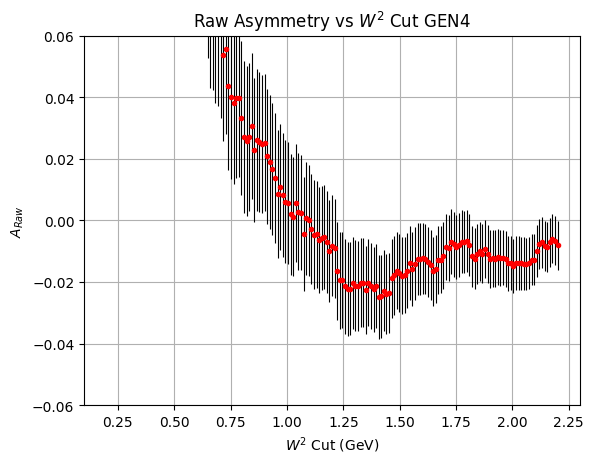

In [196]:
plt.errorbar(cutValue,weightedA,error,fmt='.',ecolor='black',color='red',lw=.8)
plt.ylim(-.06,.06)
plt.ylabel("$A_{Raw}$")
plt.title(f"Raw Asymmetry vs $W^2$ Cut GEN{config}")
plt.xlabel("$W^2$ Cut (GeV)")
plt.grid()
plt.savefig(f"../plots/CUTSENSITIVITY/GEN{config}/ARAW_{cut[0]}.png")

# Bring In Corrections

In [192]:
facc=np.sum(np.load(f'CorrectionArrays/Pass{pas}/facc{config}.npy'))
Efacc=.05*facc
Aacc=np.sum(np.load(f'CorrectionArrays/Pass{pas}/Aacc{config}.npy'))
Eacc=.05*Aacc

fproton=np.sum(np.load(f'CorrectionArrays/Pass{pas}/fproton{config}.npy'))
Efproton=.005*fproton
Aproton=np.sum(np.load(f'CorrectionArrays/Pass{pas}/Aproton{config}.npy'))
Eproton=.005*Aproton

fpion=0
Efpion=.005*fpion
Apion=0
Epion=.005*Apion

fFSI=0
EfFSI=.005*fFSI
AFSI=0
EFSI=.005*AFSI

fnitro=.05
Efnitro=.005*fnitro

Pneutron=.85
Eneutron=.005*Pneutron

fbg=np.sum(np.load(f'CorrectionArrays/Pass{pas}/fbg{config}.npy'))-fpion-facc-fFSI-fnitro
Efbg=0.05*fbg
Abg=np.sum(np.load(f'CorrectionArrays/Pass{pas}/Abg{config}.npy'))
Ebg=np.sum(np.load(f'CorrectionArrays/Pass{pas}/AbgE{config}.npy'))

#----------------------------------------------------------
farray=[facc,fproton,fbg,fpion,fFSI]
Efarray1=[Efacc,Efproton,Efbg,Efpion,EfFSI]
Efarray2=[Efacc,Efproton,Efbg,Efpion,EfFSI,Efnitro]

Aarray=[Aacc,Aproton,Abg,Apion,AFSI]
AEarray=[Eacc,Eproton,Ebg,Epion,EFSI]

fAE=ERROR.Function_f_A_ERROR(farray,Efarray1,Aarray,AEarray)
fE=ERROR.Function_f_ERROR(Efarray2)
#----------------------------------------------------------
fA= facc*Aacc + fproton*Aproton + fbg*Abg + fpion*Apion + fFSI*AFSI

f=facc + fproton + fbg + fpion + fFSI 
print(f'Accidentals f:{facc} A:{np.round(Aacc,3)} f*A:{np.round(facc*Aacc,5)}')
print(f'Proton----- f:{fproton} A:{np.round(Aproton,6)} f*A:{np.round(fproton*Aproton,8)}')
print(f'Background- f:{fbg} A:{np.round(Abg,3)} f*A:{np.round(fbg*Abg,5)}')
print(f'Pion------- f:{fpion} A:{np.round(Apion,3)} f*A:{np.round(fpion*Apion,5)}')
print(f'FSI-------- f:{fFSI} A:{np.round(AFSI,3)} f*A:{np.round(fFSI*AFSI,5)}')
print(f'Nitrogen--- f:{fnitro}')
print(f'Sum of all Correction fractions times Asymmetry: {np.round(fA,5)}')

Accidentals f:0.086 A:-0.014 f*A:-0.00121
Proton----- f:0.023 A:3e-06 f*A:8e-08
Background- f:0.48700000000000004 A:0.002 f*A:0.00088
Pion------- f:0 A:0 f*A:0
FSI-------- f:0 A:0 f*A:0
Nitrogen--- f:0.05
Sum of all Correction fractions times Asymmetry: -0.00033


# Calculate $A_{\text{Phys}}$

In [193]:
#For single cut

In [194]:

newA=np.array(A)
newYield=np.array(Y)

weightedSum=0
sumWeights=0


polsum=np.empty(0)

precorrection=0
precorrectionW=0
for i in range(0,len(newA)):
    
    PbE=.03*beamPol[i]/100
    PtE=.03*he3Pol[i]/100
    precorrection+=newA[i]*newYield[i]
    precorrectionW+=newYield[i]
    calculate=ERROR.Function_WEIGHTEDAVERAGEAPHYS(newA[i],fA,f,fnitro,beamPol[i]/100,Pneutron,he3Pol[i]/100,AE[i],fAE,fE,Efnitro,PbE,Eneutron,PtE)
    w=calculate[0]
    w_sig= calculate[1] 
    weightedSum+=(w/(w_sig**2))
    sumWeights+=1/(w_sig**2)
    


    
weighted_A=weightedSum/sumWeights
weighted_A_E=math.sqrt(1/sumWeights)


TypeError: can't multiply sequence by non-int of type 'list'

In [ ]:
print(f'A_phys= {np.round(weighted_A,5)} +/- {np.round(weighted_A_E,5)}')

plt.figure(figsize=(11,4))
plt.title("$A_{Phys}$ By Run Number")
plt.xlabel("Run Number")
plt.ylabel("$A_{Phys}$")
plt.errorbar(runs,A,yerr=AE,fmt='.',ecolor='black',color='red',lw=.8)